## Support Vector Machine - Mushroom classification
-------------------------------

### Context:

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. 

The dataset was downloaded from [Kaggle](https://www.kaggle.com/uciml/mushroom-classification) and includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. Our goal is to build a machine learning model that can predict whether a mushroom is poisonous or edible based on provided features!

### Content: 
The mushrooms dataset contains below features:
* **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
* **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
* **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
* **bruises?**: bruises=t, no=f
* **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* **gill-attachment**: attached=a, descending=d, free=f, notched=n
* **gill-spacing**: close=c, crowded=w, distant=d
* **gill-size**: broad=b, narrow=n
* **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* **stalk-shape**: enlarging=e, tapering=t
* **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
* **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **veil-type**: partial=p, universal=u
* **veil-color**: brown=n, orange=o, white=w, yellow=y
* **ring-number**: none=n, one=o, two=t
* **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
* **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
* **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### Load the dataset:

In [43]:
# Import working libraries:
import numpy as np
import pandas as pd
import math
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tools.eval_measures import mse, rmse
from sklearn. metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

%matplotlib inline
warnings.filterwarnings('ignore')

# Edit pandas display option to show more rows and columns:
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Read the dataset and print out the first 5 columns
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
# Inspect column datatype and missing values
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
# Drop 'veil-type' since there's only 1 value:
mushrooms = mushrooms.drop('veil-type', axis=1)

/Users/vilandao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


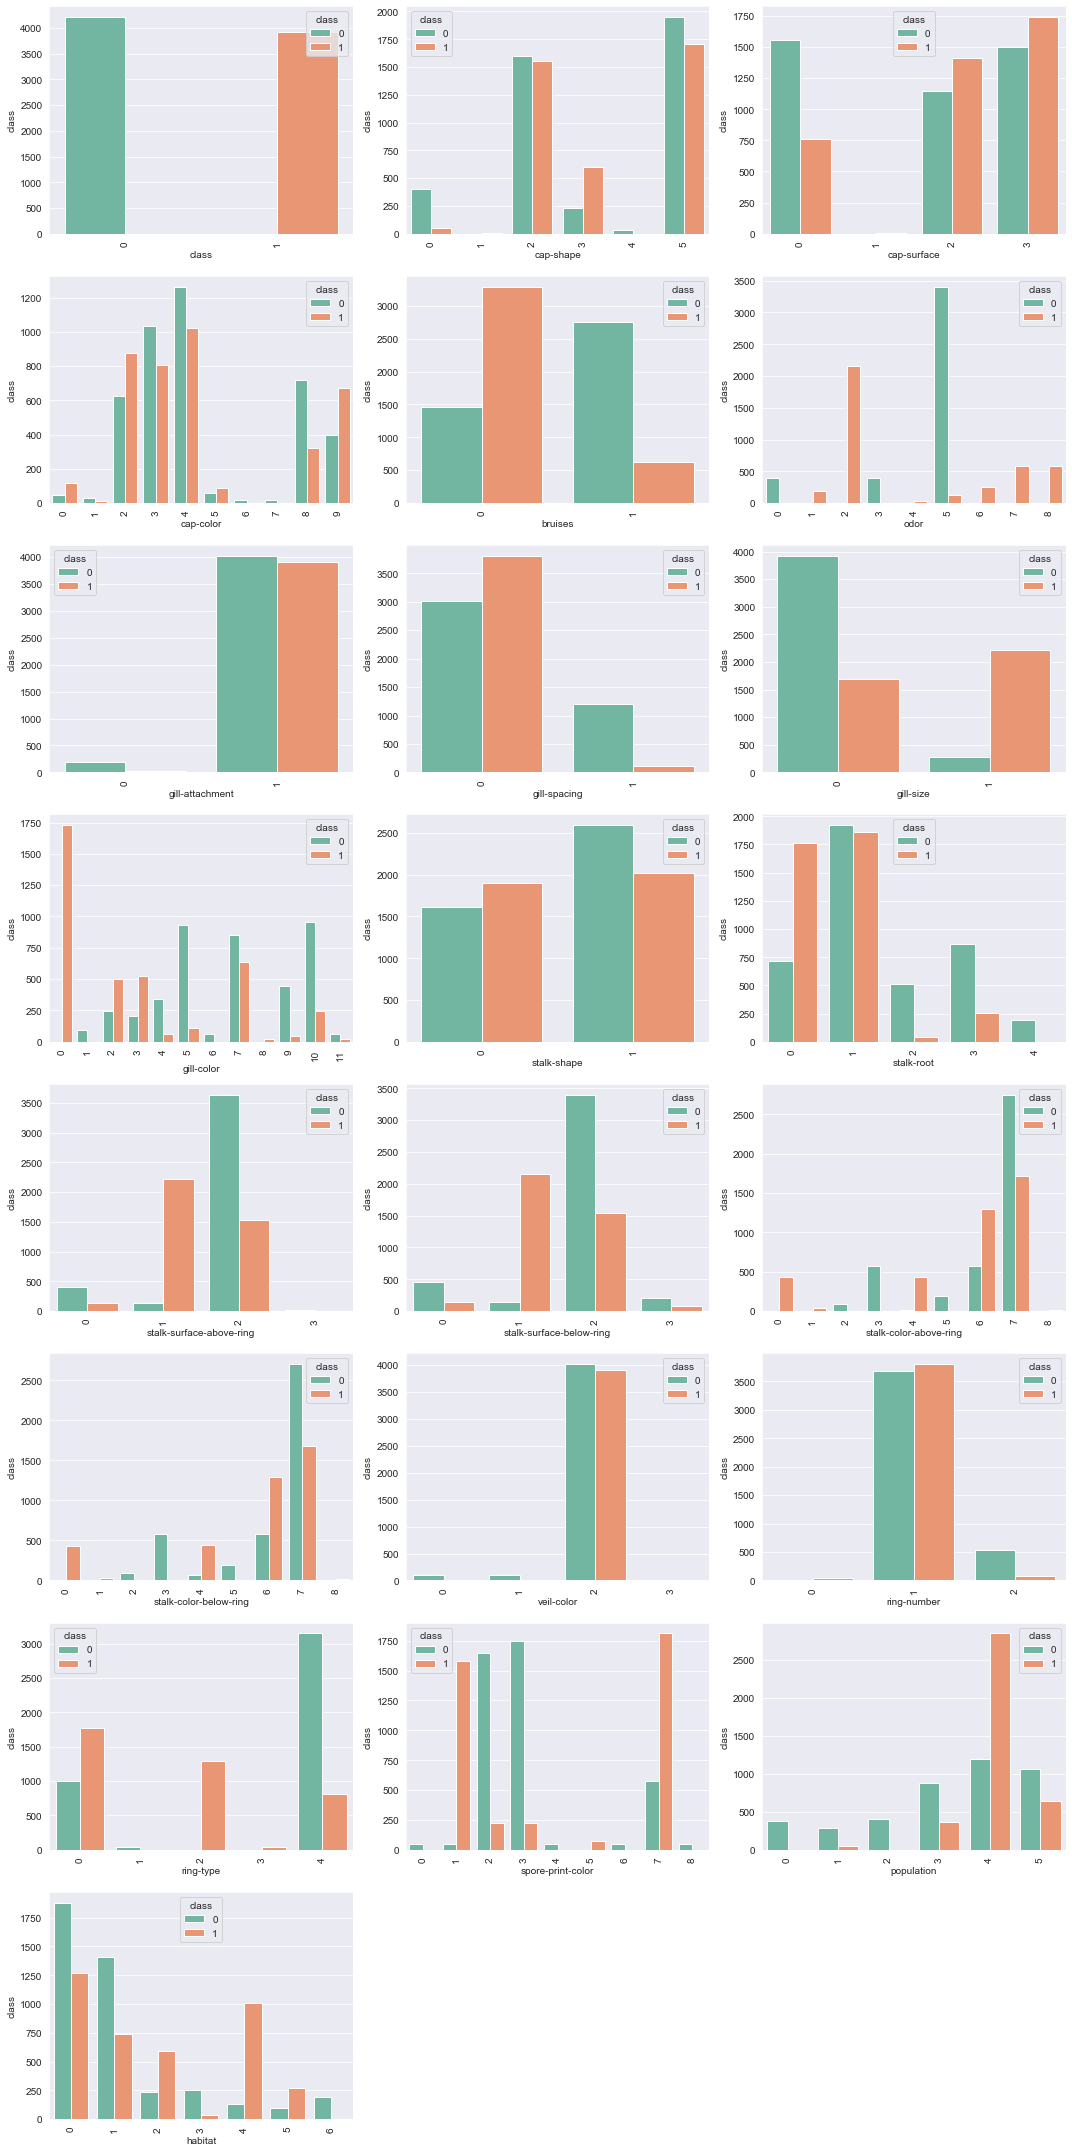

In [13]:
# Plot categorical variables against class to detect any relationship
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,30))
for i, col in enumerate(mushrooms.columns):
    fig.add_subplot(8,3,i+1)
    sns.countplot(mushrooms[col], hue = mushrooms['class'], palette = 'Set2')
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('class')
fig.tight_layout()
fig.show()


In [14]:
# Use label encoder to encode our categorical variables:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = encoder.fit_transform(mushrooms[col])

In [15]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


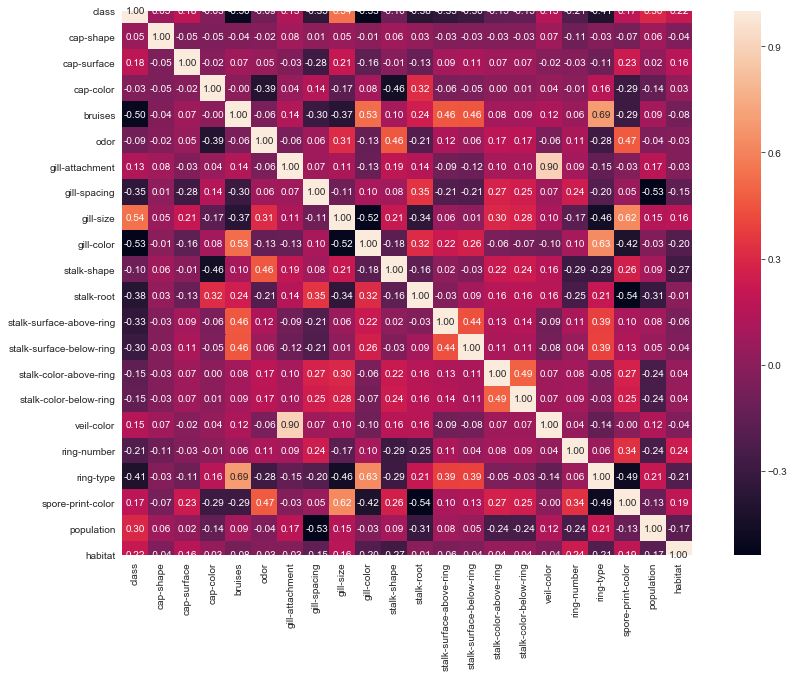

In [20]:
corr = mushrooms.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10})

In [21]:
# Eliminate highly correlated variables to avoid multicollinearity:
mushrooms = mushrooms.drop('gill-attachment', axis=1)

In [22]:
# According to our encoder, class 1 = poisonous, class 0 = edible
# Let's separate our data into target and explanatory variables:
y = mushrooms['class'] # target variable
X = mushrooms.drop('class', axis=1) # explanatory variables
print(y.shape)
print(X.shape)

(8124,)
(8124, 20)


In [24]:
# Let's inspect to check for any class imbalance:
y.value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [25]:
# Split the data into train set and test set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(6499, 20) (1625, 20)
(6499,) (1625,)


In [55]:
# Logistic regression model:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train,y_train)
y_preds_train = classifier.predict(X_train)
y_preds_test = classifier.predict(X_test)

scores = cross_val_score(classifier, X, y, cv=10)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f} \n'.format(classifier.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(classifier.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('Running time -- %s seconds -- \n' % (time.time() - start_time))
print('Cross validataion scores are: ,', scores)
print('Confusion Matrix on train set:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
print('Confusion Matrix on test set:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

R-squared of the model in training set is: 0.953 

-----Test set statistics-----
R-squared of the model in test set is: 0.950
Mean absolute error of the prediction is: 0.050
Mean squared error of the prediction is: 0.050
Root mean squared error of the prediction is: 0.223
Running time -- 0.010277032852172852 seconds -- 

Cross validataion scores are: , [0.67158672 0.85731857 0.98154982 0.98523985 0.8953202  0.86206897
 1.         0.99753695 0.62561576 0.91995074]
Confusion Matrix on train set:
[[3234  131]
 [ 174 2960]]

Confusion Matrix on test set:
[[800  43]
 [ 38 744]]



In [54]:
# Decision tree classifier: 
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

classifier.fit(X_train,y_train)
y_preds_train = classifier.predict(X_train)
y_preds_test = classifier.predict(X_test)

scores = cross_val_score(classifier, X, y, cv=10)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f} \n'.format(classifier.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(classifier.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('Running time -- %s seconds -- \n' % (time.time() - start_time))
print('Cross validataion scores are: ,', scores)
print('Confusion Matrix on train set:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
print('Confusion Matrix on test set:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

R-squared of the model in training set is: 1.000 

-----Test set statistics-----
R-squared of the model in test set is: 1.000
Mean absolute error of the prediction is: 0.000
Mean squared error of the prediction is: 0.000
Root mean squared error of the prediction is: 0.000
Running time -- 0.009813070297241211 seconds -- 

Cross validataion scores are: , [0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.92610837 1.        ]
Confusion Matrix on train set:
[[3365    0]
 [   0 3134]]

Confusion Matrix on test set:
[[843   0]
 [  0 782]]



In [56]:
# KNN classification:
from sklearn.neighbors import KNeighborsClassifier

rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    classifier = KNeighborsClassifier(n_neighbors = K)

    classifier.fit(X_train, y_train)  #fit the model
    y_preds_test=classifier.predict(X_test) #make prediction on test set
    error = math.sqrt(mse(y_test,y_preds_test)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error) 
    

start_time = time.time() # print out executing time
print('--- %s seconds ---' % (time.time() - start_time))


RMSE value for k=  1 is: 0.03508232077228117
RMSE value for k=  2 is: 0.02480694691784169
RMSE value for k=  3 is: 0.04296689244236597
RMSE value for k=  4 is: 0.03508232077228117
RMSE value for k=  5 is: 0.060764362025019995
RMSE value for k=  6 is: 0.060764362025019995
RMSE value for k=  7 is: 0.06563301233138935
RMSE value for k=  8 is: 0.07016464154456234
RMSE value for k=  9 is: 0.060764362025019995
RMSE value for k=  10 is: 0.07016464154456234
--- 0.0013730525970458984 seconds ---


In [57]:
# Since k=2 gives us the best score, let implement KNN classifier with k=2
classifier = KNeighborsClassifier(n_neighbors = 2)

classifier.fit(X_train,y_train)
y_preds_train = classifier.predict(X_train)
y_preds_test = classifier.predict(X_test)

scores = cross_val_score(classifier, X, y, cv=10)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f} \n'.format(classifier.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(classifier.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('Running time -- %s seconds -- \n' % (time.time() - start_time))
print('Cross validataion scores are: ,', scores)
print('Confusion Matrix on train set:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
print('Confusion Matrix on test set:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

R-squared of the model in training set is: 1.000 

-----Test set statistics-----
R-squared of the model in test set is: 0.999
Mean absolute error of the prediction is: 0.001
Mean squared error of the prediction is: 0.001
Root mean squared error of the prediction is: 0.025
Running time -- 0.7442512512207031 seconds -- 

Cross validataion scores are: , [0.6900369  0.99753998 1.         0.99876999 0.99630542 1.
 1.         1.         0.89285714 1.        ]
Confusion Matrix on train set:
[[3365    0]
 [   1 3133]]

Confusion Matrix on test set:
[[842   1]
 [  0 782]]



In [58]:
# Random forest classification:
from sklearn import ensemble

classifier = ensemble.RandomForestClassifier(criterion ='entropy', random_state=42)

classifier.fit(X_train,y_train)
y_preds_train = classifier.predict(X_train)
y_preds_test = classifier.predict(X_test)

scores = cross_val_score(classifier, X, y, cv=10)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f} \n'.format(classifier.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(classifier.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('Running time -- %s seconds -- \n' % (time.time() - start_time))
print('Cross validataion scores are: ,', scores)
print('Confusion Matrix on train set:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
print('Confusion Matrix on test set:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

R-squared of the model in training set is: 1.000 

-----Test set statistics-----
R-squared of the model in test set is: 1.000
Mean absolute error of the prediction is: 0.000
Mean squared error of the prediction is: 0.000
Root mean squared error of the prediction is: 0.000
Running time -- 0.13892698287963867 seconds -- 

Cross validataion scores are: , [0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.96305419 1.        ]
Confusion Matrix on train set:
[[3365    0]
 [   0 3134]]

Confusion Matrix on test set:
[[843   0]
 [  0 782]]



In [59]:
# Support vector machine classifier:
from sklearn.svm import SVC

classifier = SVC(random_state=42, probability=True)

classifier.fit(X_train,y_train)
y_preds_train = classifier.predict(X_train)
y_preds_test = classifier.predict(X_test)

scores = cross_val_score(classifier, X, y, cv=10)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f} \n'.format(classifier.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(classifier.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('Running time -- %s seconds -- \n' % (time.time() - start_time))
print('Cross validataion scores are: ,', scores)
print('Confusion Matrix on train set:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
print('Confusion Matrix on test set:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

R-squared of the model in training set is: 0.991 

-----Test set statistics-----
R-squared of the model in test set is: 0.994
Mean absolute error of the prediction is: 0.006
Mean squared error of the prediction is: 0.006
Root mean squared error of the prediction is: 0.078
Running time -- 0.2585330009460449 seconds -- 

Cross validataion scores are: , [0.67773678 0.98769988 0.99876999 0.99630996 0.95073892 0.93472906
 1.         1.         0.65024631 0.9864532 ]
Confusion Matrix on train set:
[[3361    4]
 [  53 3081]]

Confusion Matrix on test set:
[[842   1]
 [  9 773]]

